In [21]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
import pickle
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [22]:
house=pd.read_csv('/home/rumana/Desktop/DM-Project/Data/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [23]:
house.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,9,0,California,State,CA,202000.0,202858.0,203939.0,206212.0,208648.0,...,618058.0,625183.0,633066.0,643395.0,657771.0,675081.0,693765.0,707528.0,717393.0,722406.0
1,54,1,Texas,State,TX,112272.0,112394.0,112433.0,112636.0,112685.0,...,228554.0,231287.0,234193.0,237785.0,242050.0,247399.0,252964.0,258544.0,263319.0,267523.0
2,43,2,New York,State,NY,149265.0,150029.0,150667.0,152014.0,153231.0,...,334073.0,337373.0,340603.0,343807.0,347876.0,352801.0,358418.0,363238.0,367263.0,370310.0
3,14,3,Florida,State,FL,116594.0,116938.0,117302.0,118009.0,118681.0,...,273768.0,276926.0,280659.0,284695.0,290166.0,297066.0,305069.0,313179.0,321137.0,328576.0
4,21,4,Illinois,State,IL,147344.0,147667.0,148107.0,148971.0,149861.0,...,219767.0,221822.0,223719.0,226240.0,228558.0,231718.0,235181.0,238582.0,241119.0,243355.0


In [24]:
house.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
46,3,46,Alaska,State,AK,133553.0,133742.0,133896.0,134024.0,134274.0,...,301927.0,302342.0,301920.0,302692.0,304212.0,305423.0,306271.0,307911.0,309191.0,310373.0
47,37,47,North Dakota,State,ND,NaN,NaN,NaN,NaN,NaN,...,241745.0,243541.0,245193.0,246701.0,248170.0,249953.0,251907.0,253742.0,255681.0,257423.0
48,58,48,Vermont,State,VT,128010.0,128382.0,128856.0,129711.0,130547.0,...,281707.0,285282.0,289361.0,292748.0,297423.0,301228.0,305577.0,310037.0,315673.0,320499.0
49,12,49,District of Columbia,State,DC,192801.0,193803.0,194735.0,196847.0,198821.0,...,662142.0,663639.0,669123.0,673352.0,680337.0,685130.0,688713.0,689163.0,689293.0,691553.0
50,62,50,Wyoming,State,WY,NaN,NaN,NaN,NaN,NaN,...,268446.0,270678.0,273246.0,275246.0,277291.0,279793.0,282329.0,285111.0,287750.0,290304.0


In [25]:
print(house.isnull().any())


RegionID      False
SizeRank      False
RegionName    False
RegionType    False
StateName     False
              ...  
2021-06-30    False
2021-07-31    False
2021-08-31    False
2021-09-30    False
2021-10-31    False
Length: 267, dtype: bool


In [26]:
print(house.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2021-06-30    0
2021-07-31    0
2021-08-31    0
2021-09-30    0
2021-10-31    0
Length: 267, dtype: int64


In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 267 entries, RegionID to 2021-10-31
dtypes: float64(262), int64(2), object(3)
memory usage: 106.5+ KB


In [28]:
house.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
count,51.000000,51.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,33.137255,25.000000,133365.021277,133717.702128,134084.106383,134805.000000,135561.468085,136301.404255,137066.765957,137844.000000,...,285822.647059,289406.176471,293333.725490,297339.039216,302180.137255,307727.980392,313478.294118,318605.058824,322839.568627,326565.235294
std,17.260382,14.866069,36662.747314,36835.919959,37049.343967,37474.944016,37943.752616,38422.805496,38904.751832,39413.688272,...,128794.137640,130129.198267,131873.050639,133880.200092,136624.660703,139772.761110,143059.330489,145696.677168,147719.825540,149410.755181
min,3.000000,0.000000,66908.000000,66965.000000,67034.000000,67159.000000,67282.000000,67455.000000,67666.000000,67967.000000,...,113664.000000,114537.000000,115542.000000,116499.000000,117304.000000,118160.000000,119070.000000,119982.000000,120846.000000,121757.000000
25%,19.500000,12.500000,108253.000000,108509.000000,108698.500000,109155.500000,109620.000000,110104.000000,110519.500000,110855.000000,...,194728.000000,197324.000000,200084.500000,202431.000000,205232.000000,208317.000000,211379.500000,213882.500000,215826.000000,217641.500000
50%,34.000000,25.000000,128010.000000,128382.000000,128856.000000,129711.000000,130547.000000,131222.000000,131867.000000,132526.000000,...,268446.000000,270678.000000,273246.000000,275246.000000,277291.000000,279793.000000,282329.000000,285111.000000,287750.000000,290304.000000
75%,46.500000,37.500000,155851.500000,156305.500000,156708.500000,157550.000000,158370.000000,159254.500000,159955.500000,160613.500000,...,334780.500000,339434.500000,344001.500000,349759.000000,357232.500000,365156.000000,370820.000000,379199.000000,386328.000000,393114.000000
max,62.000000,50.000000,223224.000000,223103.000000,223599.000000,224290.000000,225650.000000,226992.000000,228263.000000,229840.000000,...,688063.000000,694918.000000,703490.000000,711782.000000,723353.000000,736259.000000,751744.000000,766390.000000,781628.000000,795879.000000


In [29]:
Price_H=house[house['RegionName']=='Colorado'].copy()
Price_H

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
21,10,21,Colorado,State,CO,185680.0,186584.0,187441.0,189377.0,191292.0,...,444671.0,450713.0,457711.0,465449.0,475356.0,486960.0,498807.0,508487.0,516182.0,522970.0


In [41]:
y=Price_H.iloc[:, 5:].astype(float)
y=y.T
print(len(y))

262


In [42]:
x=[]
for i in range(len(y)):
    x.append(i+1)
print(len(x))

262


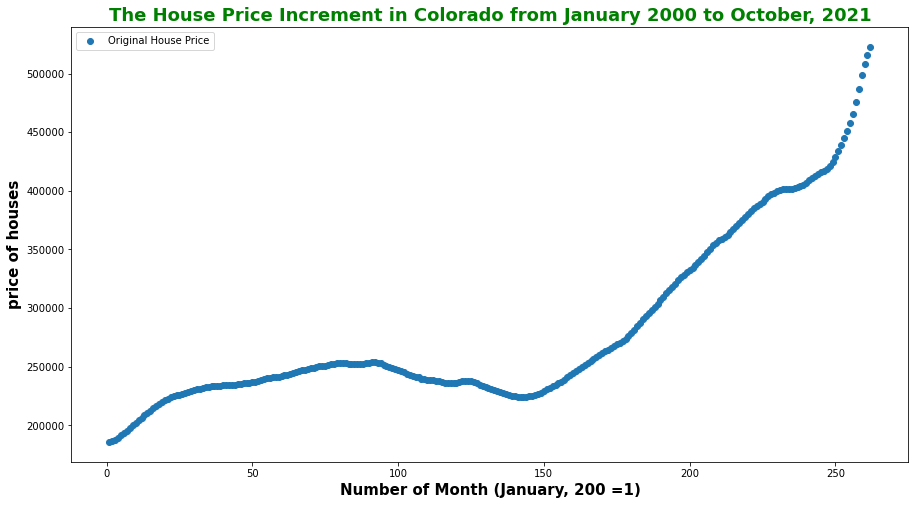

In [50]:
plt.figure(figsize=(15,8))
plt.scatter(x,y, label='Original House Price')

plt.xlabel('Number of Month (January, 200 =1)', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("The House Price Increment in Colorado from January 2000 to October, 2021", fontsize='18',color='green', fontweight='bold')
plt.legend()

In [51]:
house.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31'],
      dtype='object', length=267)

In [52]:
Modified_House_data=house.copy()

In [53]:
Modified_House_data = Modified_House_data.dropna(subset=['2021-07-31'])

In [54]:
print(Modified_House_data.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2021-06-30    0
2021-07-31    0
2021-08-31    0
2021-09-30    0
2021-10-31    0
Length: 267, dtype: int64


In [58]:
House_data=house.iloc[:, 5:].copy()

In [61]:
House_Data_without_Price=house.iloc[:,0:5].copy()

In [62]:
House_data

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,202000.0,202858.0,203939.0,206212.0,208648.0,211184.0,213818.0,216610.0,219418.0,222080.0,...,618058.0,625183.0,633066.0,643395.0,657771.0,675081.0,693765.0,707528.0,717393.0,722406.0
1,112272.0,112394.0,112433.0,112636.0,112685.0,112755.0,112760.0,112973.0,113220.0,113478.0,...,228554.0,231287.0,234193.0,237785.0,242050.0,247399.0,252964.0,258544.0,263319.0,267523.0
2,149265.0,150029.0,150667.0,152014.0,153231.0,154482.0,155500.0,156344.0,157083.0,157929.0,...,334073.0,337373.0,340603.0,343807.0,347876.0,352801.0,358418.0,363238.0,367263.0,370310.0
3,116594.0,116938.0,117302.0,118009.0,118681.0,119349.0,120007.0,120684.0,121374.0,122077.0,...,273768.0,276926.0,280659.0,284695.0,290166.0,297066.0,305069.0,313179.0,321137.0,328576.0
4,147344.0,147667.0,148107.0,148971.0,149861.0,150728.0,151682.0,152791.0,153937.0,155071.0,...,219767.0,221822.0,223719.0,226240.0,228558.0,231718.0,235181.0,238582.0,241119.0,243355.0
5,105962.0,106321.0,106611.0,107175.0,107664.0,108109.0,108558.0,108951.0,109366.0,109760.0,...,219689.0,222140.0,224648.0,227332.0,230902.0,234763.0,238226.0,241007.0,243167.0,245153.0
6,109887.0,110049.0,110221.0,110669.0,111210.0,111792.0,112284.0,112743.0,113199.0,113647.0,...,170318.0,172390.0,174854.0,177188.0,179707.0,182322.0,184919.0,187225.0,189273.0,190984.0
7,123302.0,123508.0,123901.0,124599.0,125456.0,126268.0,127190.0,128039.0,128819.0,129544.0,...,193167.0,195660.0,198162.0,200528.0,203351.0,206783.0,210368.0,213526.0,215837.0,218051.0
8,130961.0,131403.0,131843.0,132725.0,133565.0,134392.0,135189.0,136048.0,136920.0,137849.0,...,228172.0,231352.0,234697.0,238382.0,242615.0,247722.0,253201.0,258746.0,264030.0,269441.0
9,134226.0,134555.0,134837.0,135421.0,135970.0,136509.0,136995.0,137433.0,137862.0,138340.0,...,230488.0,233940.0,237615.0,241088.0,245221.0,250233.0,256031.0,262143.0,267910.0,273098.0


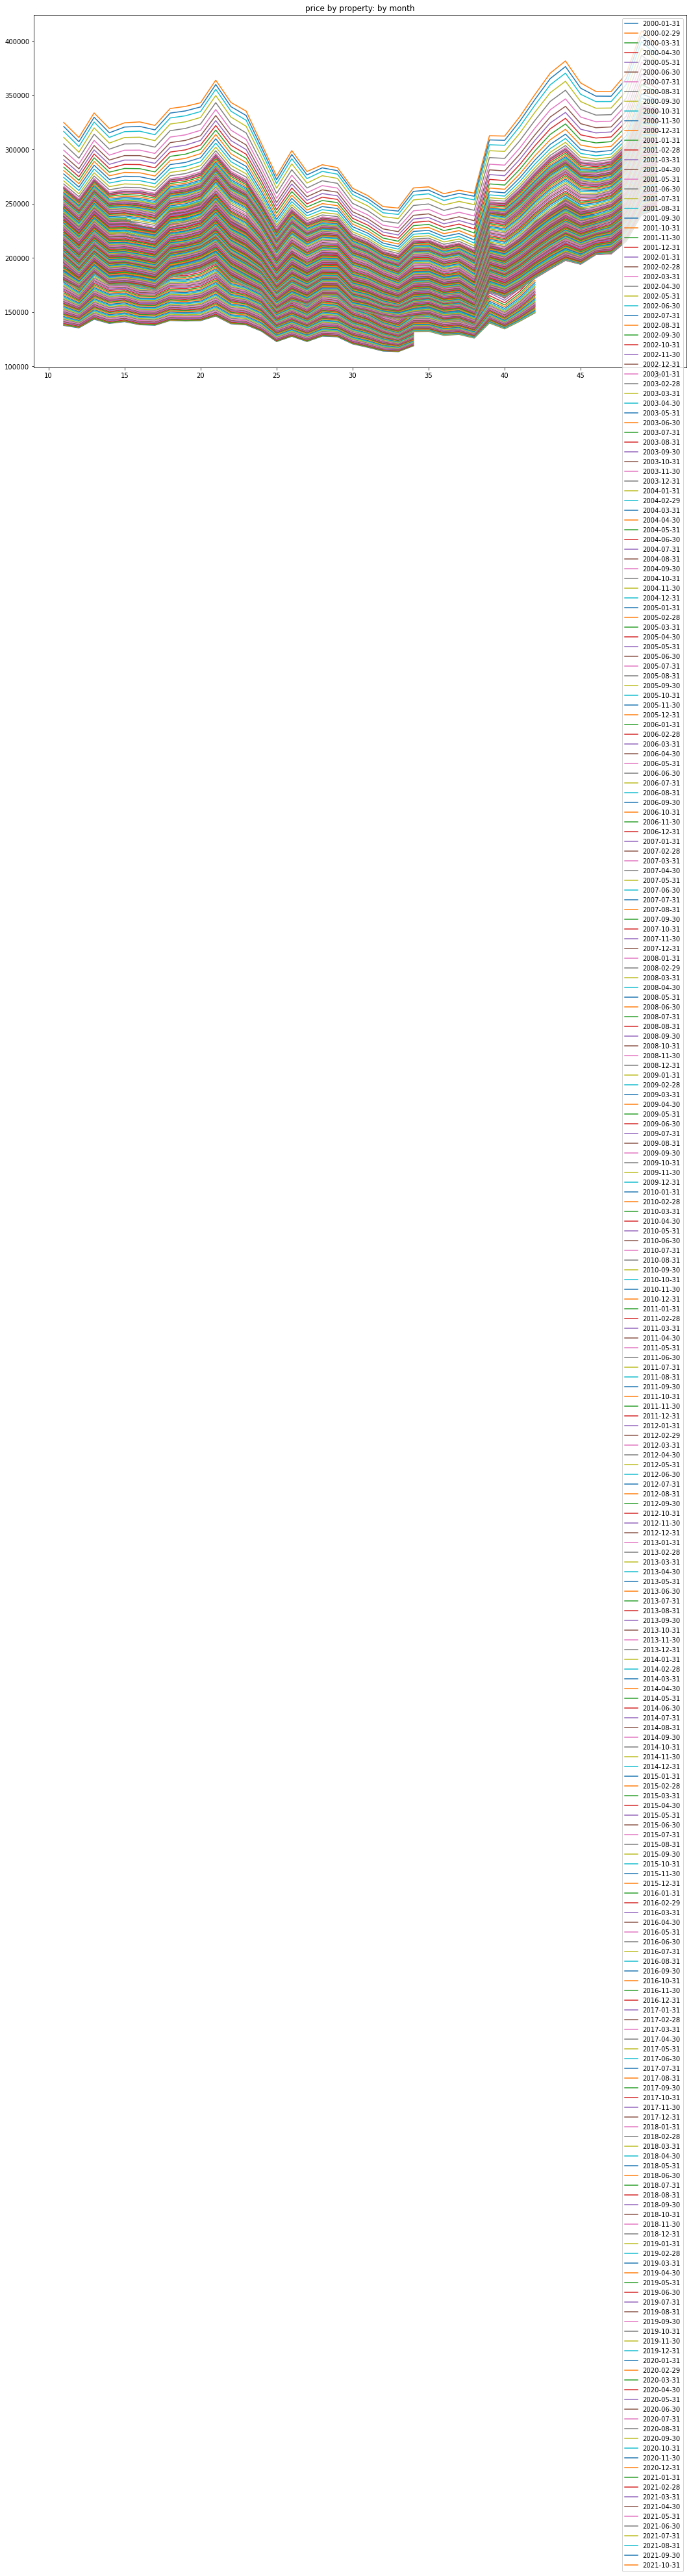

In [76]:
House_data.rolling(12).mean().plot(figsize=(18,10),
                                    title="price by property: by month")

In [64]:
house.iloc[:, 9:].mean(axis=1)

0     418177.205426
1     154427.042636
2     253932.437984
3     197243.089147
4     193332.205426
5     166241.480620
6     129450.790698
7     139547.209302
8     164484.271318
9     170145.906977
10    318227.325581
11    243608.794574
12    290063.015504
13    355206.848837
14    126055.937984
15    207857.472868
16    150001.565891
17    138253.798450
18    282246.585271
19    161259.031008
20    207119.286822
21    283284.934109
22    126532.445736
23    162561.279070
24    151283.011628
25    120038.496124
26    266898.065891
27    108702.290698
28    260514.267442
29    126097.240310
30    110491.736434
31    109698.527132
32    126966.806202
33    250858.841085
34    238290.825581
35    177761.548936
36     92151.992248
37    139030.554264
38    194472.348837
39    499746.689922
40    198790.488372
41    244611.434109
42    261433.914729
43    238412.880597
44    234265.693798
45    164056.662791
46    237966.507752
47    208181.577922
48    222331.972868
49    459394.081395


In [65]:
Modified_House_data

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,9,0,California,State,CA,202000.0,202858.0,203939.0,206212.0,208648.0,...,618058.0,625183.0,633066.0,643395.0,657771.0,675081.0,693765.0,707528.0,717393.0,722406.0
1,54,1,Texas,State,TX,112272.0,112394.0,112433.0,112636.0,112685.0,...,228554.0,231287.0,234193.0,237785.0,242050.0,247399.0,252964.0,258544.0,263319.0,267523.0
2,43,2,New York,State,NY,149265.0,150029.0,150667.0,152014.0,153231.0,...,334073.0,337373.0,340603.0,343807.0,347876.0,352801.0,358418.0,363238.0,367263.0,370310.0
3,14,3,Florida,State,FL,116594.0,116938.0,117302.0,118009.0,118681.0,...,273768.0,276926.0,280659.0,284695.0,290166.0,297066.0,305069.0,313179.0,321137.0,328576.0
4,21,4,Illinois,State,IL,147344.0,147667.0,148107.0,148971.0,149861.0,...,219767.0,221822.0,223719.0,226240.0,228558.0,231718.0,235181.0,238582.0,241119.0,243355.0
5,47,5,Pennsylvania,State,PA,105962.0,106321.0,106611.0,107175.0,107664.0,...,219689.0,222140.0,224648.0,227332.0,230902.0,234763.0,238226.0,241007.0,243167.0,245153.0
6,44,6,Ohio,State,OH,109887.0,110049.0,110221.0,110669.0,111210.0,...,170318.0,172390.0,174854.0,177188.0,179707.0,182322.0,184919.0,187225.0,189273.0,190984.0
7,30,7,Michigan,State,MI,123302.0,123508.0,123901.0,124599.0,125456.0,...,193167.0,195660.0,198162.0,200528.0,203351.0,206783.0,210368.0,213526.0,215837.0,218051.0
8,16,8,Georgia,State,GA,130961.0,131403.0,131843.0,132725.0,133565.0,...,228172.0,231352.0,234697.0,238382.0,242615.0,247722.0,253201.0,258746.0,264030.0,269441.0
9,36,9,North Carolina,State,NC,134226.0,134555.0,134837.0,135421.0,135970.0,...,230488.0,233940.0,237615.0,241088.0,245221.0,250233.0,256031.0,262143.0,267910.0,273098.0


In [66]:
missing_counts = pd.DataFrame({'variable_name':House_data.columns,
                                 'num_of_missing_values':list(House_data.isnull().sum())})


In [67]:
missing_counts.head(30)

,variable_name,num_of_missing_values
0,2000-01-31,4
1,2000-02-29,4
2,2000-03-31,4
3,2000-04-30,4
4,2000-05-31,4
5,2000-06-30,4
6,2000-07-31,4
7,2000-08-31,4
8,2000-09-30,4
9,2000-10-31,4


In [68]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

House_data_imputed = pd.DataFrame(imp_mean.fit_transform(House_data),
                                           columns=House_data.columns)

In [69]:
House_data_imputed

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,202000.000000,202858.000000,203939.000000,206212.0,208648.000000,211184.000000,213818.000000,216610.0,219418.000000,222080.000000,...,618058.0,625183.0,633066.0,643395.0,657771.0,675081.0,693765.0,707528.0,717393.0,722406.0
1,112272.000000,112394.000000,112433.000000,112636.0,112685.000000,112755.000000,112760.000000,112973.0,113220.000000,113478.000000,...,228554.0,231287.0,234193.0,237785.0,242050.0,247399.0,252964.0,258544.0,263319.0,267523.0
2,149265.000000,150029.000000,150667.000000,152014.0,153231.000000,154482.000000,155500.000000,156344.0,157083.000000,157929.000000,...,334073.0,337373.0,340603.0,343807.0,347876.0,352801.0,358418.0,363238.0,367263.0,370310.0
3,116594.000000,116938.000000,117302.000000,118009.0,118681.000000,119349.000000,120007.000000,120684.0,121374.000000,122077.000000,...,273768.0,276926.0,280659.0,284695.0,290166.0,297066.0,305069.0,313179.0,321137.0,328576.0
4,147344.000000,147667.000000,148107.000000,148971.0,149861.000000,150728.000000,151682.000000,152791.0,153937.000000,155071.000000,...,219767.0,221822.0,223719.0,226240.0,228558.0,231718.0,235181.0,238582.0,241119.0,243355.0
5,105962.000000,106321.000000,106611.000000,107175.0,107664.000000,108109.000000,108558.000000,108951.0,109366.000000,109760.000000,...,219689.0,222140.0,224648.0,227332.0,230902.0,234763.0,238226.0,241007.0,243167.0,245153.0
6,109887.000000,110049.000000,110221.000000,110669.0,111210.000000,111792.000000,112284.000000,112743.0,113199.000000,113647.000000,...,170318.0,172390.0,174854.0,177188.0,179707.0,182322.0,184919.0,187225.0,189273.0,190984.0
7,123302.000000,123508.000000,123901.000000,124599.0,125456.000000,126268.000000,127190.000000,128039.0,128819.000000,129544.000000,...,193167.0,195660.0,198162.0,200528.0,203351.0,206783.0,210368.0,213526.0,215837.0,218051.0
8,130961.000000,131403.000000,131843.000000,132725.0,133565.000000,134392.000000,135189.000000,136048.0,136920.000000,137849.000000,...,228172.0,231352.0,234697.0,238382.0,242615.0,247722.0,253201.0,258746.0,264030.0,269441.0
9,134226.000000,134555.000000,134837.000000,135421.0,135970.000000,136509.000000,136995.000000,137433.0,137862.000000,138340.000000,...,230488.0,233940.0,237615.0,241088.0,245221.0,250233.0,256031.0,262143.0,267910.0,273098.0


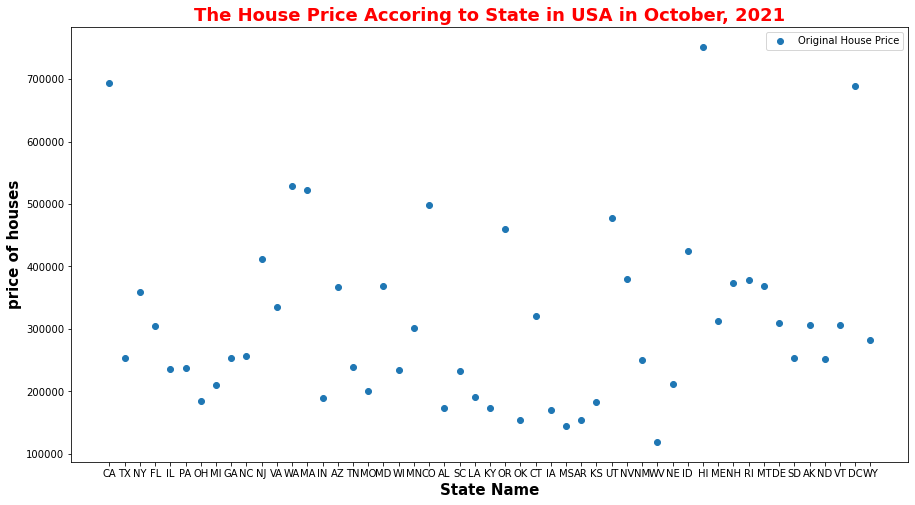

In [74]:
plt.figure(figsize=(15,8))
plt.scatter(house['StateName'],House_data_imputed['2021-07-31'], label='Original House Price')
plt.xlabel('State Name', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("The House Price Accoring to State in USA in October, 2021", fontsize='18',color='red', fontweight='bold')
plt.legend()

In [151]:
House_data_imputed.columns = House_data_imputed.columns.dt.date

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [319]:
House_data_imputed

,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,11/30/1996,12/31/1996,1/31/1997,2/28/1997,...,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021
0,160021.000000,159868.000000,159774.000000,159759.000000,159785.000000,159935.000000,160113.000000,160368.000000,160385.000000,160465.000000,...,598672.0,605983.0,613609.0,621460.0,629879.0,638884.0,650017.0,665278.0,683203.0,700828.0
1,98999.000000,99117.000000,99206.000000,99328.000000,99484.000000,99666.000000,99884.000000,100126.000000,100150.000000,100151.000000,...,221145.0,223362.0,225797.0,228167.0,231007.0,234038.0,237782.0,242074.0,247114.0,252422.0
2,138337.000000,138271.000000,138191.000000,138109.000000,138072.000000,138091.000000,138148.000000,138252.000000,138228.000000,138507.000000,...,341555.0,344870.0,348243.0,351507.0,354943.0,358604.0,362676.0,367654.0,373371.0,379457.0
3,102018.000000,102250.000000,102472.000000,102672.000000,102803.000000,102939.000000,103092.000000,103284.000000,103294.000000,103360.000000,...,264391.0,266896.0,269739.0,272935.0,276423.0,280398.0,284995.0,290696.0,297520.0,305266.0
4,128236.000000,128355.000000,128376.000000,129240.000000,130334.000000,132130.000000,132080.000000,131741.000000,130818.000000,131182.000000,...,215440.0,217364.0,219276.0,221003.0,223136.0,225269.0,227957.0,230795.0,234125.0,237462.0
5,97251.000000,97204.000000,97169.000000,97208.000000,97236.000000,97319.000000,97422.000000,97556.000000,97657.000000,97763.000000,...,211146.0,213513.0,215999.0,218534.0,221095.0,223778.0,226760.0,230354.0,234154.0,237742.0
6,94496.000000,94792.000000,95054.000000,95347.000000,95650.000000,95957.000000,96261.000000,96576.000000,96879.000000,97184.000000,...,164644.0,166576.0,168508.0,170420.0,172317.0,174420.0,176711.0,179093.0,181640.0,184247.0
7,93647.000000,94326.000000,94941.000000,95511.000000,96035.000000,96555.000000,97127.000000,97752.000000,98409.000000,99011.000000,...,187040.0,189172.0,191426.0,193568.0,195890.0,198164.0,200685.0,203905.0,207836.0,211760.0
8,105808.000000,106189.000000,106544.000000,106901.000000,107251.000000,107631.000000,108028.000000,108458.000000,108805.000000,109204.000000,...,219822.0,222224.0,224884.0,227662.0,230511.0,233595.0,237159.0,241432.0,246300.0,251514.0
9,113235.000000,113687.000000,114166.000000,114635.000000,115047.000000,115532.000000,116073.000000,116653.000000,117218.000000,117773.000000,...,222117.0,224318.0,226837.0,229745.0,232923.0,236403.0,240088.0,244339.0,249215.0,254625.0


In [108]:
House_data_imputed.columns.get_loc("1996-03-31")

2

In [17]:
House_data_imputed.iloc[:,15].name-House_data_imputed.iloc[:,0].name

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [87]:
end_date=House_data_imputed.iloc[:,15].name
start_date=House_data_imputed.iloc[:,0].name
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
print(num_months)

15


In [76]:
Price=House_data_imputed.mean(axis=1)

0        701299.540717
1        415979.977199
2        745286.726384
3        271009.742671
4        534175.162866
             ...      
30834    153676.869246
30835    132737.005257
30836    170699.835283
30837    231617.037037
30838    165487.313327
Length: 30839, dtype: float64

In [73]:
House_Data_without_Price

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County
...,...,...,...,...,...,...,...,...,...
30834,89666,34430,72630,Zip,AR,AR,Diamond City,Harrison,Boone County
30835,62532,34430,12345,Zip,OR,OR,Central Point,Medford,Jackson County
30836,87060,34430,66045,Zip,KS,KS,Lawrence,Lawrence,Douglas County
30837,58379,34430,1470,Zip,MA,MA,Groton,Boston-Cambridge-Newton,Middlesex County


In [77]:
House_Data_without_Price['Avg_Price']=House_data_imputed.mean(axis=1)

In [78]:
House_Data_without_Price

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Avg_Price
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,701299.540717
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,415979.977199
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,745286.726384
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,271009.742671
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,534175.162866
...,...,...,...,...,...,...,...,...,...,...
30834,89666,34430,72630,Zip,AR,AR,Diamond City,Harrison,Boone County,153676.869246
30835,62532,34430,12345,Zip,OR,OR,Central Point,Medford,Jackson County,132737.005257
30836,87060,34430,66045,Zip,KS,KS,Lawrence,Lawrence,Douglas County,170699.835283
30837,58379,34430,1470,Zip,MA,MA,Groton,Boston-Cambridge-Newton,Middlesex County,231617.037037


Text(0, 0.5, 'price of a house')

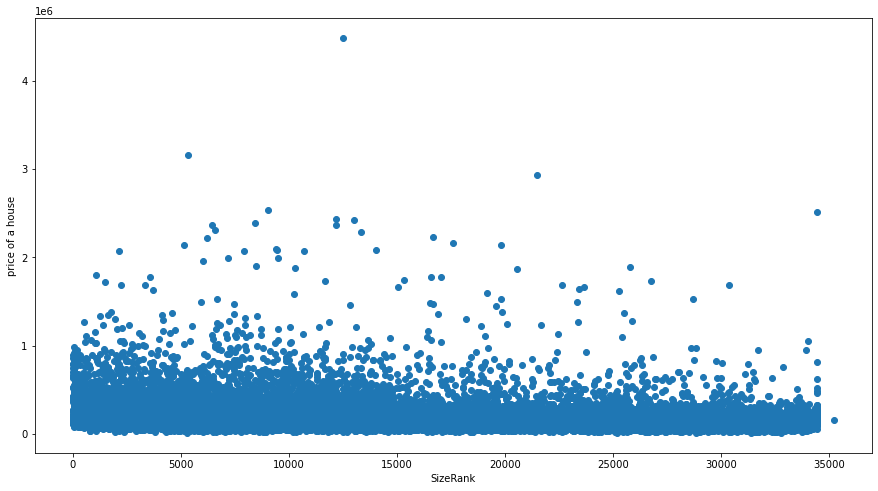

In [87]:
plt.figure(figsize=(15,8))
plt.scatter(House_Data_without_Price.SizeRank,House_Data_without_Price.Avg_Price)
plt.xlabel('SizeRank')
plt.ylabel('price of a house')

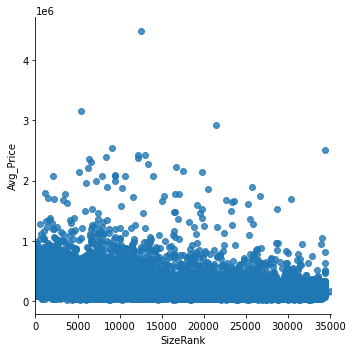

In [89]:
sns.lmplot('SizeRank','Avg_Price',data=House_Data_without_Price)

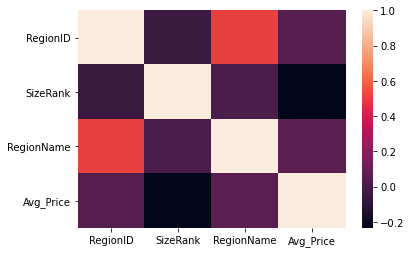

In [90]:
#corr -correlation matrix
sns.heatmap(House_Data_without_Price.corr())

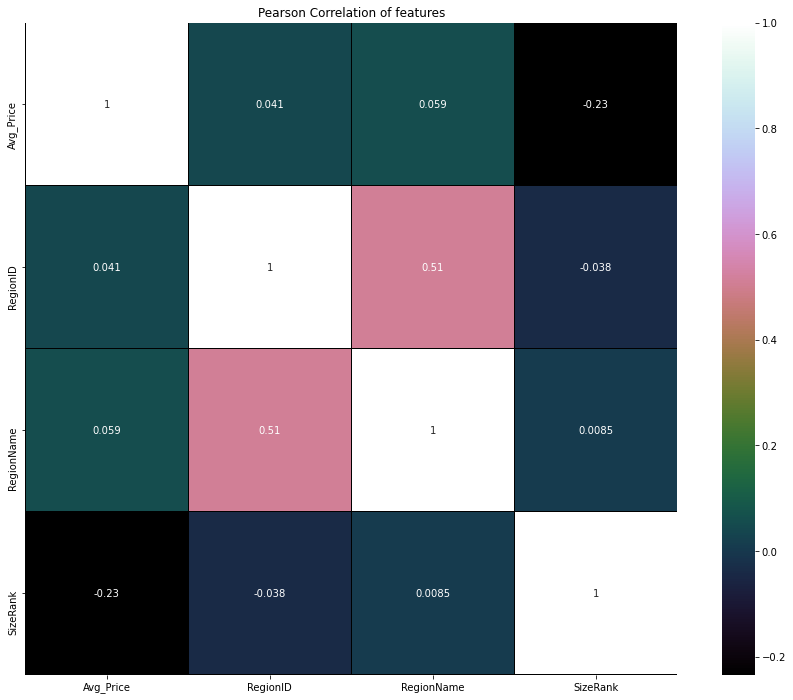

In [91]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in House_Data_without_Price.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = House_Data_without_Price.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = House_Data_without_Price[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

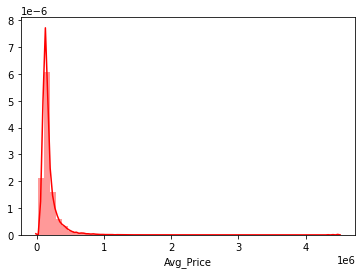

In [93]:
#distribution plot
sns.distplot(House_Data_without_Price['Avg_Price'],color='red')

In [ ]:
sns.boxplot(x='RegionName',y='Avg_Price',data=House_Data_without_Price)

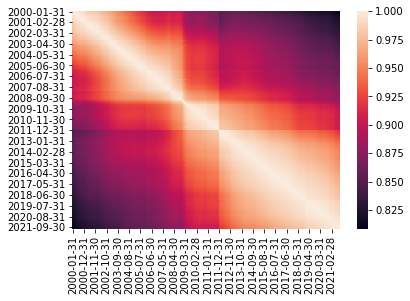

In [171]:
#corr -correlation matrix
sns.heatmap(House_data_imputed.corr())

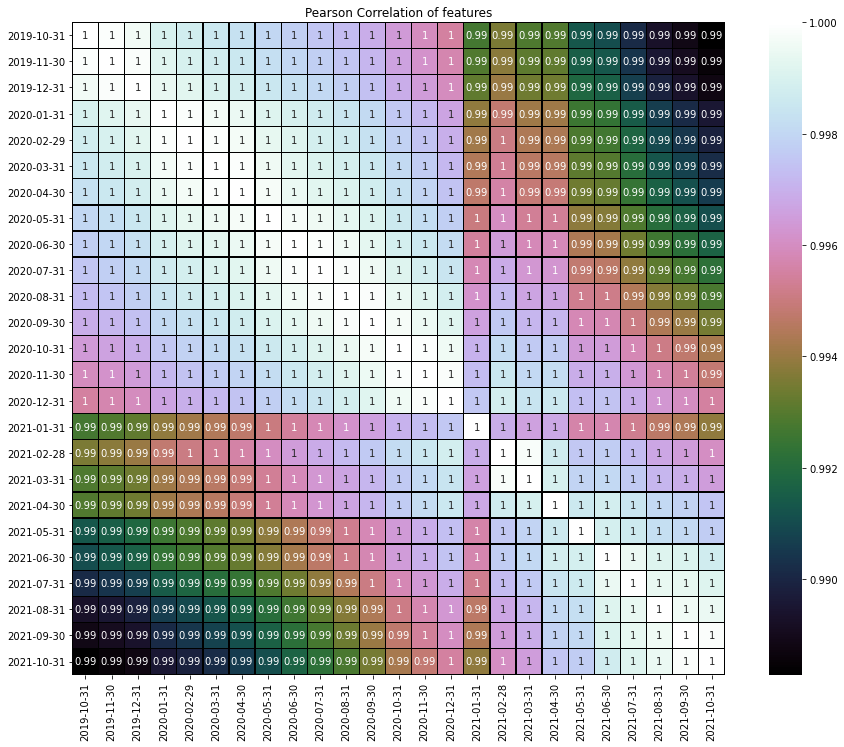

In [190]:

# Get to the numeric columns by inversion  
col=len(House_data_imputed.columns)
num_list = num_list = House_data_imputed.iloc[:,237:col].columns
# Create Dataframe containing only numerical features
house_num = House_data_imputed[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [179]:


col

261

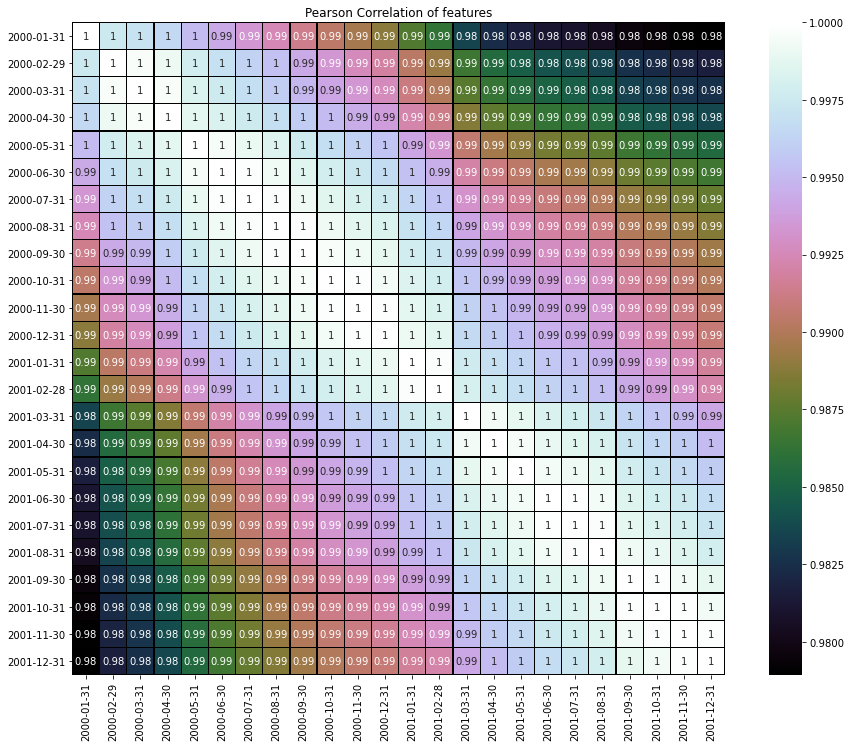

In [191]:
# Get to the numeric columns by inversion            
num_list = House_data_imputed.iloc[:,0:24].columns
# Create Dataframe containing only numerical features
house_num = House_data_imputed[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [320]:
X_data=House_data_imputed.copy()
X_data.columns = pd.to_datetime(X_data.columns)

In [347]:
start_date=X_data.iloc[:,0].name
xtrain=[]
for i in range(0, len(X_data.columns)):
    end_date=X_data.iloc[:,i].name
    num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
    xtrain.append(num_months)
print(xtrain)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [348]:
num_list = House_data_imputed.columns

In [349]:
ytrain = House_data_imputed[num_list]

In [350]:
ytrain

,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,11/30/1996,12/31/1996,1/31/1997,2/28/1997,...,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021
0,160021.000000,159868.000000,159774.000000,159759.000000,159785.000000,159935.000000,160113.000000,160368.000000,160385.000000,160465.000000,...,598672.0,605983.0,613609.0,621460.0,629879.0,638884.0,650017.0,665278.0,683203.0,700828.0
1,98999.000000,99117.000000,99206.000000,99328.000000,99484.000000,99666.000000,99884.000000,100126.000000,100150.000000,100151.000000,...,221145.0,223362.0,225797.0,228167.0,231007.0,234038.0,237782.0,242074.0,247114.0,252422.0
2,138337.000000,138271.000000,138191.000000,138109.000000,138072.000000,138091.000000,138148.000000,138252.000000,138228.000000,138507.000000,...,341555.0,344870.0,348243.0,351507.0,354943.0,358604.0,362676.0,367654.0,373371.0,379457.0
3,102018.000000,102250.000000,102472.000000,102672.000000,102803.000000,102939.000000,103092.000000,103284.000000,103294.000000,103360.000000,...,264391.0,266896.0,269739.0,272935.0,276423.0,280398.0,284995.0,290696.0,297520.0,305266.0
4,128236.000000,128355.000000,128376.000000,129240.000000,130334.000000,132130.000000,132080.000000,131741.000000,130818.000000,131182.000000,...,215440.0,217364.0,219276.0,221003.0,223136.0,225269.0,227957.0,230795.0,234125.0,237462.0
5,97251.000000,97204.000000,97169.000000,97208.000000,97236.000000,97319.000000,97422.000000,97556.000000,97657.000000,97763.000000,...,211146.0,213513.0,215999.0,218534.0,221095.0,223778.0,226760.0,230354.0,234154.0,237742.0
6,94496.000000,94792.000000,95054.000000,95347.000000,95650.000000,95957.000000,96261.000000,96576.000000,96879.000000,97184.000000,...,164644.0,166576.0,168508.0,170420.0,172317.0,174420.0,176711.0,179093.0,181640.0,184247.0
7,93647.000000,94326.000000,94941.000000,95511.000000,96035.000000,96555.000000,97127.000000,97752.000000,98409.000000,99011.000000,...,187040.0,189172.0,191426.0,193568.0,195890.0,198164.0,200685.0,203905.0,207836.0,211760.0
8,105808.000000,106189.000000,106544.000000,106901.000000,107251.000000,107631.000000,108028.000000,108458.000000,108805.000000,109204.000000,...,219822.0,222224.0,224884.0,227662.0,230511.0,233595.0,237159.0,241432.0,246300.0,251514.0
9,113235.000000,113687.000000,114166.000000,114635.000000,115047.000000,115532.000000,116073.000000,116653.000000,117218.000000,117773.000000,...,222117.0,224318.0,226837.0,229745.0,232923.0,236403.0,240088.0,244339.0,249215.0,254625.0


In [351]:
Y_train=ytrain.T

In [352]:
Y_train.shape

(303, 51)

In [353]:
X_train = pd.DataFrame(xtrain, columns=['Month_number'])

In [354]:
X_train.set_index('Month_number')

""
Month_number
0
1
2
3
4
...
298
299
300


In [355]:
X_train.shape

(303, 1)

In [356]:
#feature scaling
#from sklearn.preprocessing import StandardScaler
#sc_x=StandardScaler()
#X_train=sc_x.fit_transform(xtrain)


In [357]:
model=LinearRegression()

In [358]:
model.fit(X_train, Y_train)

LinearRegression()

In [359]:
r_sq = model.score(X_train, Y_train)

In [360]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7134533361244413


In [361]:
print('intercept:', model.intercept_)

intercept: [188039.48784089  88443.45190637 152544.12936425 117813.56407417
 157490.71122112 102270.9598098  104511.82842626 113039.85580598
 120156.56418273 121405.28259076 210179.55732152 137943.77711916
 136006.24991315 203148.71730068  99520.99593973 126727.95203665
  96922.04640003  94610.71182908 177995.31828643 111313.58450582
 131607.37330641 141416.61514244  94988.65279225 111983.29095015
  98047.4204881   82475.09143217 127095.83033698  69650.23091454
 196079.03832291  84811.69717301  80278.81898124  73721.44335157
  82945.87480459 141888.12063575 170343.13327254 122582.08169287
  64424.44445892  91718.53530485  96448.38930867 197849.2060535
 113169.0916493  140106.1003778  159636.36642348 108575.03087408
 157813.31027445  94302.51233281 119453.28834462 114101.380584
 126156.68397169 151717.7669359  114515.09563242]


In [384]:
Intercept_I=model.intercept_
Intercept_I[21]

141416.6151424353

In [362]:
print('slope:', model.coef_)

slope: [[1259.31902136]
 [ 374.99440632]
 [ 625.05251683]
 [ 420.54470932]
 [ 177.90351452]
 [ 345.92486127]
 [ 132.14971667]
 [ 139.79570063]
 [ 234.75435606]
 [ 264.07639663]
 [ 549.02660222]
 [ 565.49060243]
 [ 851.58501686]
 [ 801.77532966]
 [ 154.32796167]
 [ 434.45788326]
 [ 291.02288245]
 [ 228.42115961]
 [ 552.7113317 ]
 [ 268.10167409]
 [ 415.0823091 ]
 [ 803.1743626 ]
 [ 170.01491058]
 [ 268.95665513]
 [ 287.21403169]
 [ 206.21441864]
 [ 769.53326357]
 [ 214.54505787]
 [ 313.57948961]
 [ 228.97407288]
 [ 161.21390616]
 [ 196.24535363]
 [ 238.12101795]
 [ 624.959007  ]
 [ 342.739659  ]
 [ 291.77076662]
 [ 156.04168752]
 [ 263.58231816]
 [ 545.67287477]
 [1659.96215692]
 [ 461.55214369]
 [ 549.56113447]
 [ 522.93185089]
 [ 626.72578307]
 [ 414.27515107]
 [ 392.41721337]
 [ 628.20459055]
 [ 408.98683039]
 [ 535.13307885]
 [1733.34545535]
 [ 493.19536777]]


In [410]:
Coefficient_s=model.coef_
Coefficient_s[21]

array([803.1743626])

In [412]:
X_test = np.array([303]).reshape((-1, 1))
Growth_Prediction=model.predict(X_test)

In [413]:
T_Predict=Growth_Prediction[0].T

In [414]:
T_Predict[21]

384778.44700893934

In [415]:
Final_Prediction=[]

for i in range(0,len(T_Predict)):
    print("Prediction:", T_Predict[i], 'Coefficient:', Coefficient_s[i],'Intercept:', Intercept_I[i] )
    Final_Prediction.append(T_Predict[i]+((Coefficient_s[i]*302)-Intercept_I[i]))

Prediction: 569613.1513124823 Coefficient: [1259.31902136] Intercept: 188039.4878408893
Prediction: 202066.75702139753 Coefficient: [374.99440632] Intercept: 88443.45190637483
Prediction: 341935.0419644613 Coefficient: [625.05251683] Intercept: 152544.12936425215
Prediction: 245238.6109981859 Coefficient: [420.54470932] Intercept: 117813.56407417057
Prediction: 211395.47612178436 Coefficient: [177.90351452] Intercept: 157490.71122112212
Prediction: 207086.19277424435 Coefficient: [345.92486127] Intercept: 102270.95980979677
Prediction: 144553.1925775359 Coefficient: [132.14971667] Intercept: 104511.82842626367
Prediction: 155397.95309597184 Coefficient: [139.79570063] Intercept: 113039.85580597533
Prediction: 191287.13406771142 Coefficient: [234.75435606] Intercept: 120156.56418273406
Prediction: 201420.43076956703 Coefficient: [264.07639663] Intercept: 121405.28259075907
Prediction: 376534.61779555434 Coefficient: [549.02660222] Intercept: 210179.55732152163
Prediction: 309287.4296548

In [416]:
Final_Prediction[21]

array([485920.48937041])